In [4]:
import pandas as pd
from ftplib import FTP
import os

#read in supplementary table
drugInfo = pd.read_csv("Drug_Info_Supp_Table.csv")
drugInfo["Drug"] = drugInfo["Drug"].str.strip()

#group all drugs by their type and turn into dictionary
drugTypes = drugInfo.groupby("Type")["Drug"].apply(list).to_dict()
#print(drugTypes)

# get ordered list of drugs arranged by drug type
orderedDrugsList = []
type_boundaries = []
for type, drugs in drugTypes.items():
    for drug in drugs:
        orderedDrugsList.append(drug)
    type_boundaries.append(len(orderedDrugsList))

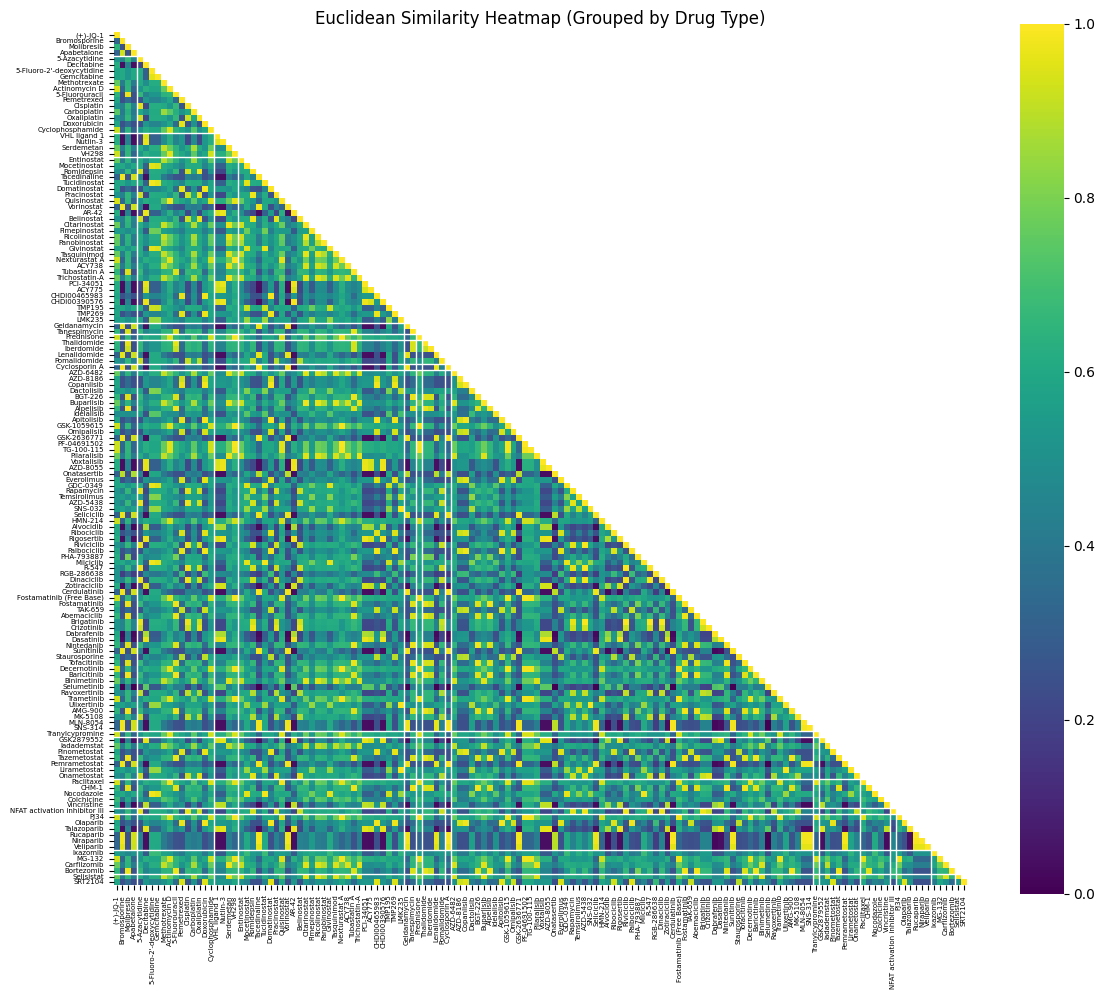

In [12]:
# create EUCLIDEAN similarity matrix for mean intensity
import numpy
import sklearn 
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
import matplotlib.pyplot as plt


# load matrix and fill in empty vals with 0 
meanIntensityMatrix = pd.read_csv("Mean_Intensity_Matrix_All_Drugs.csv", index_col = 0).fillna(0)
# make column names just the drug name (remove _Mean_Intensity suffix!)
meanIntensityMatrix.columns = meanIntensityMatrix.columns.str.removesuffix("_Mean_Intensity")

# transpose data so drugs become rows instead of columns
transposedData = meanIntensityMatrix.transpose()
# save drug names index column for after
drugNames = transposedData.index

# plug transposed data into euclidean_distances function
eucDistanceMatrix = euclidean_distances(transposedData)
# convert to a dataframe and make row and column labels be the drug names
eucDistanceMatrix = pd.DataFrame(eucDistanceMatrix, columns = drugNames, index = drugNames)
eucDistanceMatrix.to_csv("Euc_Distance_Matrix.csv")

# normalize euclidean distances and convert to similarity instead of distance (inverse)
minDistance = eucDistanceMatrix.min().min()
maxDistance = eucDistanceMatrix.max().max()

normalizedEucDistances = (eucDistanceMatrix - minDistance) / (maxDistance - minDistance)
eucSimilarityMatrix = 1 - normalizedEucDistances

reorderedEucMatrix = eucSimilarityMatrix.loc[orderedDrugsList, orderedDrugsList]
upperMask = numpy.triu(numpy.ones_like(reorderedEucMatrix, dtype=bool), k=1)

# plot heatmap with boundary lines
plt.figure(figsize=(12, 10))
sns.heatmap(reorderedEucMatrix, cmap='viridis', square=True, xticklabels=True, yticklabels=True, mask = upperMask)

# draw grid lines at group boundaries
for boundary in type_boundaries[:-1]:  # skip the last boundary (not needed)
    plt.axhline(boundary, color='white', linewidth=1)
    plt.axvline(boundary, color='white', linewidth=1)

plt.title("Euclidean Similarity Heatmap (Grouped by Drug Type)")
plt.xticks(rotation=90, fontsize = 5)
plt.yticks(rotation=0, fontsize = 5)
plt.tight_layout()
plt.show()


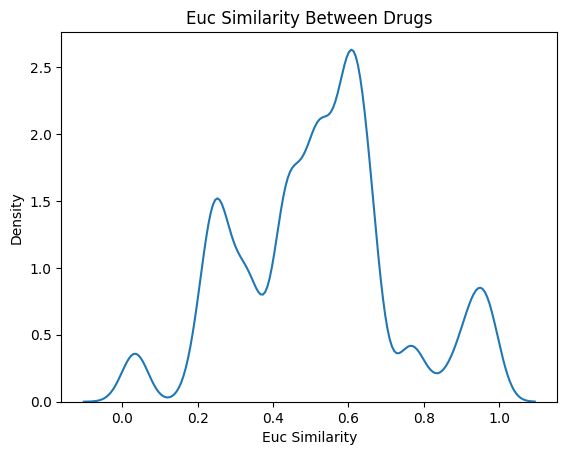

In [7]:
# plot overall euc distribution for intensity 

eucArray = eucSimilarityMatrix.to_numpy()
# get the indices of the lower triangle in the array
bottomDiagIndices = numpy.tril_indices_from(eucArray, k = -1)
# use indices to get values of the lower triangle in the array
bottomDiagVals = eucArray[bottomDiagIndices]

# plot the distribution
sns.kdeplot(bottomDiagVals)
plt.xlabel("Euc Similarity")
plt.title("Euc Similarity Between Drugs")
plt.show()

Type: BET inhibitor
Drugs:
	['(+)-JQ-1', 'Bromosporine', 'Molibresib', 'Apabetalone']


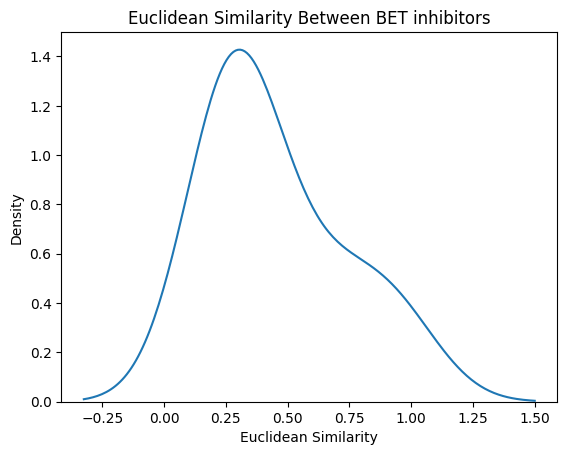

Type: Chemo drug
Drugs:
	['5-Azacytidine', 'Decitabine', "5-Fluoro-2'-deoxycytidine", 'Gemcitabine', 'Methotrexate', 'Actinomycin D', '5-Fluorouracil', 'Pemetrexed', 'Cisplatin', 'Carboplatin', 'Oxaliplatin', 'Doxorubicin', 'Cyclophosphamide']


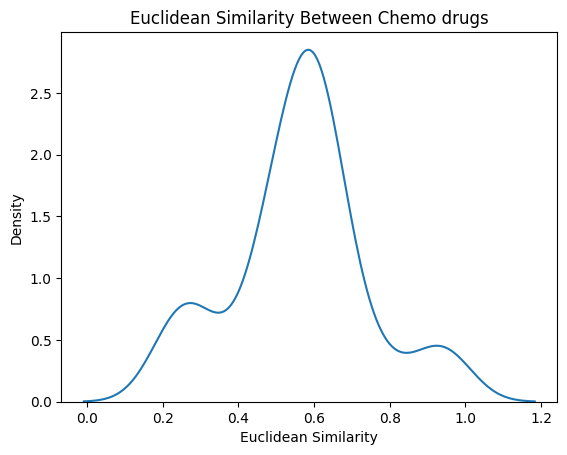

Type: E3 ligase ligands
Drugs:
	['VHL ligand 1', 'Nutlin-3', 'Serdemetan', 'VH298']


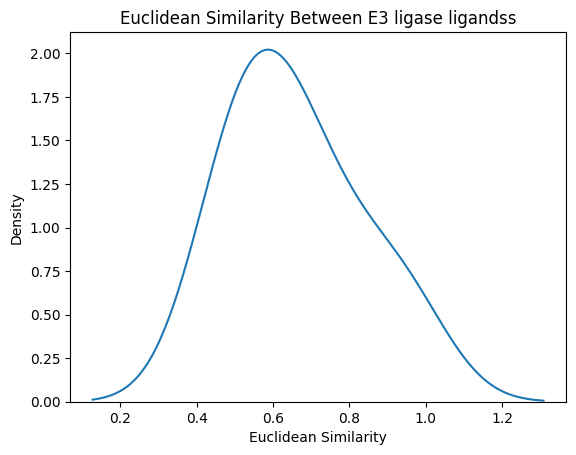

Type: HDAC inhibitor
Drugs:
	['Entinostat', 'Mocetinostat', 'Romidepsin', 'Tacedinaline', 'Tucidinostat', 'Domatinostat', 'Pracinostat', 'Quisinostat', 'Vorinostat', 'AR-42', 'Belinostat', 'Citarinostat', 'Fimepinostat', 'Ricolinostat', 'Panobinostat', 'Givinostat', 'Tasquinimod', 'Nexturastat A', 'ACY738', 'Tubastatin A', 'Trichostatin-A', 'PCI-34051', 'ACY775', 'CHDI00465983', 'CHDI00390576', 'TMP195', 'TMP269', 'LMK235']


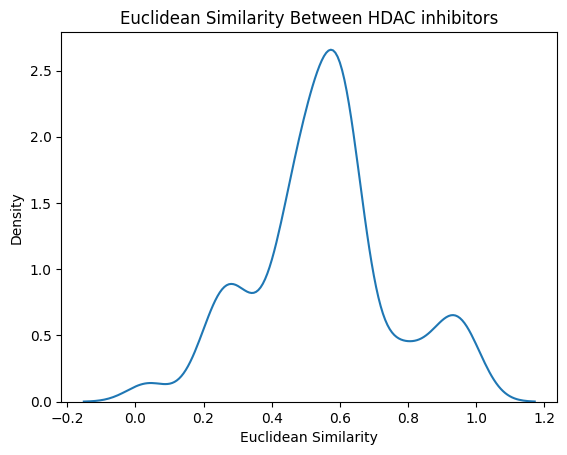

Type: HSP90 inhibitor
Drugs:
	['Geldanamycin', 'Tanespimycin']


/var/folders/25/8s28vb8x6b35yx_pfsfqj06w0000gn/T/ipykernel_36543/487160030.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subBottomVals)


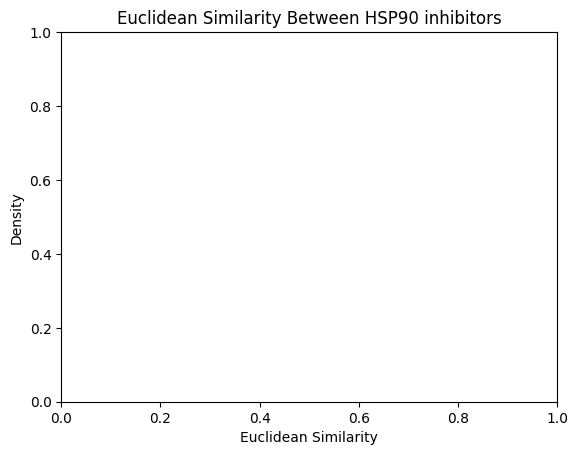

Type: Hormone-like
Drugs:
	['Prednisone']


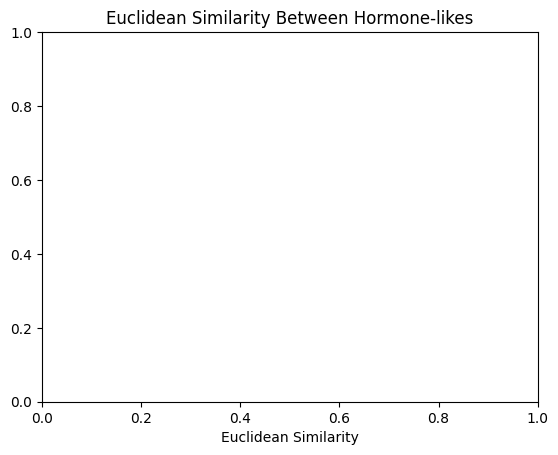

Type: IMiD
Drugs:
	['Thalidomide', 'Iberdomide', 'Lenalidomide', 'Pomalidomide']


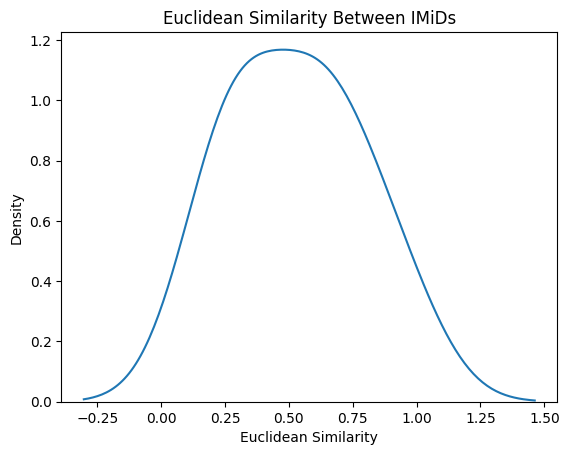

Type: Immunosuppressor
Drugs:
	['Cyclosporin A']


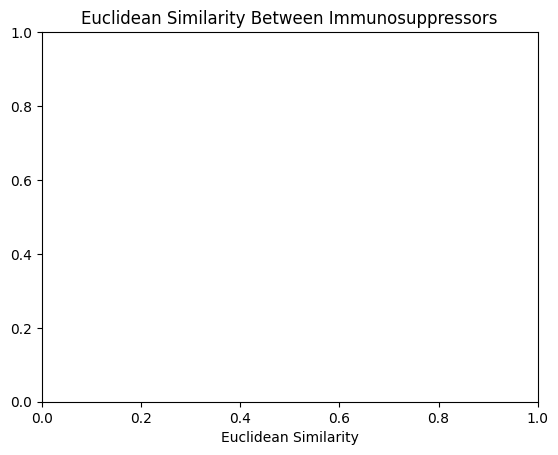

Type: Kinase inhibitor
Drugs:
	['AZD-6482', 'AZD-8186', 'Copanlisib', 'Dactolisib', 'BGT-226', 'Buparlisib', 'Alpelisib', 'Idelalisib', 'Apitolisib', 'GSK-1059615', 'Omipalisib', 'GSK-2636771', 'PF-04691502', 'TG-100-115', 'Pilaralisib', 'Voxtalisib', 'AZD-8055', 'Onatasertib', 'Everolimus', 'GDC-0349', 'Rapamycin', 'Temsirolimus', 'AZD-5438', 'SNS-032', 'Seliciclib', 'HMN-214', 'Alvocidib', 'Ribociclib', 'Rigosertib', 'Riviciclib', 'Palbociclib', 'PHA-793887', 'Milciclib', 'R-547', 'RGB-286638', 'Dinaciclib', 'Zotiraciclib', 'Cerdulatinib', 'Fostamatinib (Free Base)', 'Fostamatinib', 'TAK-659', 'Abemaciclib', 'Brigatinib', 'Crizotinib', 'Dabrafenib', 'Dasatinib', 'Nintedanib', 'Sunitinib', 'Staurosporine', 'Tofacitinib', 'Decernotinib', 'Baricitinib', 'Binimetinib', 'Selumetinib', 'Ravoxertinib', 'Trametinib', 'Ulixertinib', 'AMG-900', 'MK-5108', 'MLN-8054', 'SNS-314']


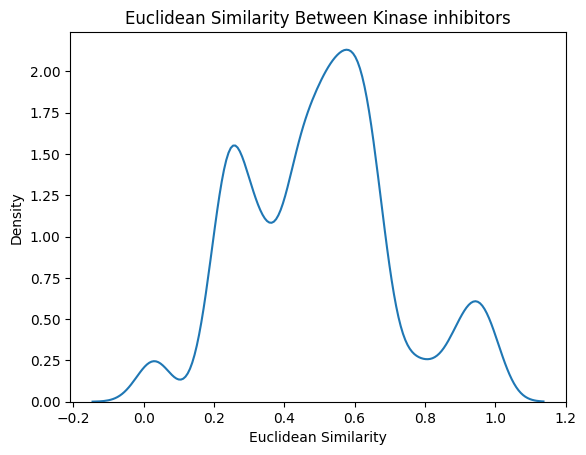

Type: MAOi
Drugs:
	['Tranylcypromine']


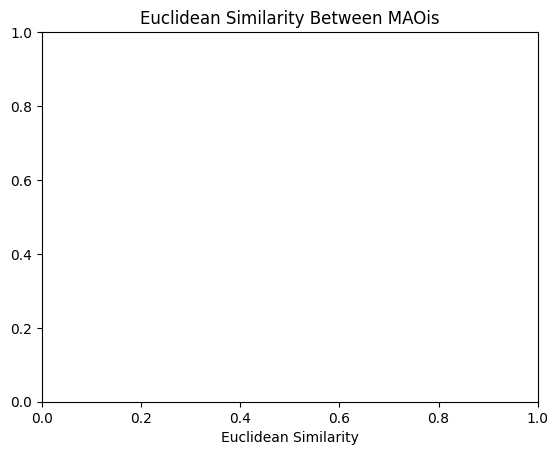

Type: Methyltransferase inhibitor
Drugs:
	['GSK2879552', 'Iadademstat', 'Pinometostat', 'Tazemetostat', 'Pemrametostat', 'Lirametostat', 'Onametostat']


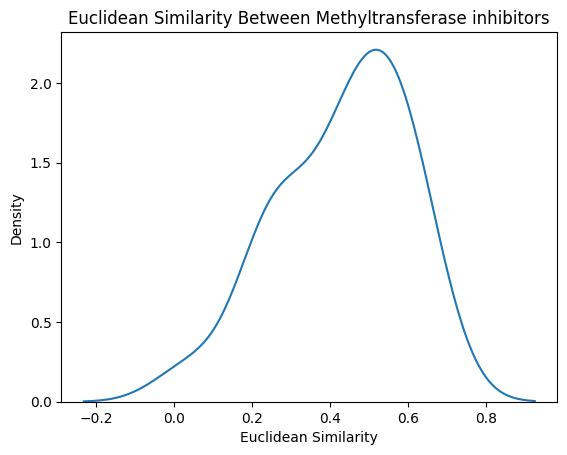

Type: Mitotic inhibitor
Drugs:
	['Paclitaxel', 'CHM-1', 'Nocodazole', 'Colchicine', 'Vincristine']


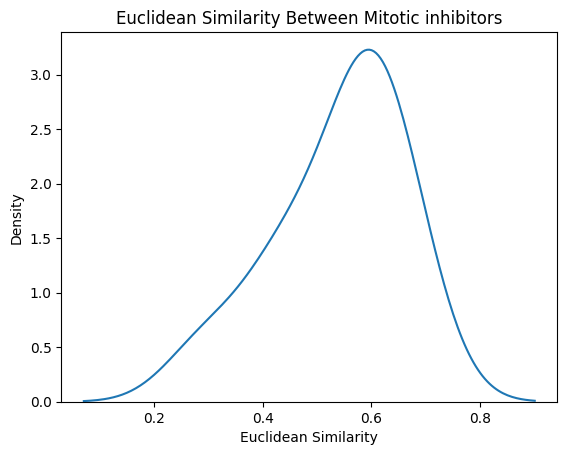

Type: NFAT activation inhibitor
Drugs:
	['NFAT activation inhibitor III']


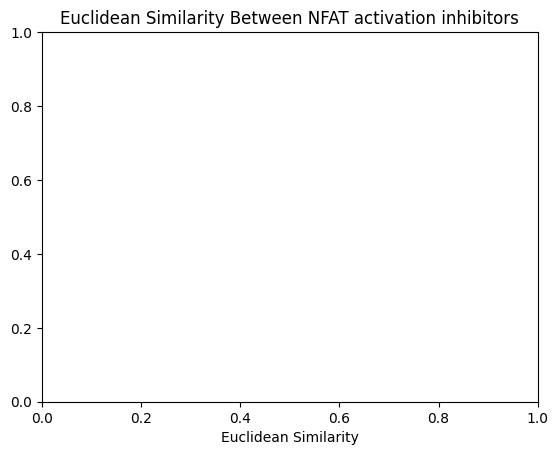

Type: PARP inhibitor
Drugs:
	['PJ34', 'Olaparib', 'Talazoparib', 'Rucaparib', 'Niraparib', 'Veliparib']


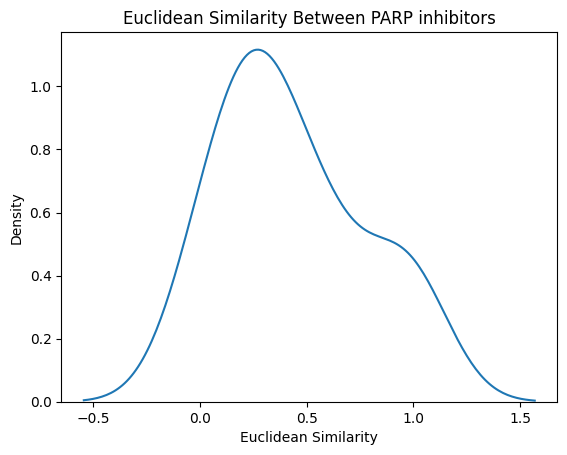

Type: Proteasome inhibitor
Drugs:
	['Ixazomib', 'MG-132', 'Carfilzomib', 'Bortezomib']


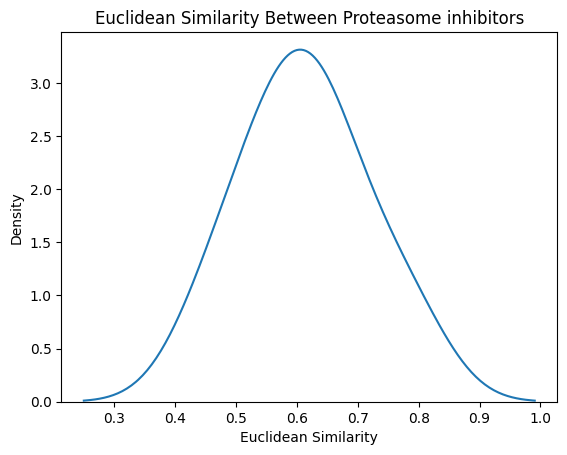

Type: SIRT inhibitor
Drugs:
	['Selisistat', 'SRT2104']


/var/folders/25/8s28vb8x6b35yx_pfsfqj06w0000gn/T/ipykernel_36543/487160030.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subBottomVals)


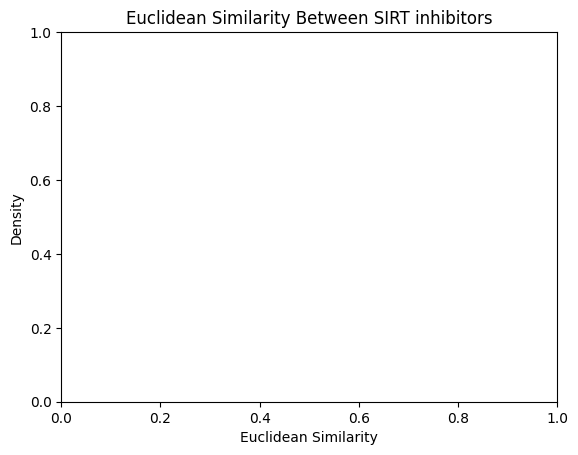

In [10]:
# plot distributions for each drug subtype 
for type, drugNames in drugTypes.items():
    print(f"Type: {type}\nDrugs:\n\t{drugNames}")

    # get the sub-matrix of drugs for this type 
    subTypeMatrix = eucSimilarityMatrix.loc[drugNames, drugNames]
    # convert submatrix to a numpy array
    subArray = subTypeMatrix.to_numpy()
    # get indices of the lower triangle
    subBottomIndices = numpy.tril_indices_from(subArray, k = -1)
    # use indices to get values of the lower triangle
    subBottomVals = subArray[subBottomIndices]

    # plot the distribution
    sns.kdeplot(subBottomVals)
    plt.xlabel("Euclidean Similarity")
    plt.title(f"Euclidean Similarity Between {type}s")
    plt.show()